In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
import time
import warnings
warnings.filterwarnings('ignore')
pd.set_option('expand_frame_repr', False) 
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 120)

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [16]:
test_data = pd.read_csv('cs-test.csv',index_col=['Unnamed: 0'])
X_test = test_data.iloc[:, 1:]
X_test

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101499,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101500,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101501,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101502,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [86]:
test_data_y = pd.read_csv('sampleEntry.csv',index_col=['Id'])

# To create a new column 'Predict' based on the values in column 'Probability', 
# where values greater than or equal to 0.5 are assigned 1 and values less than 0.5 are assigned 0
test_data_y['Predict'] = test_data_y['Probability'].apply(lambda x: 1 if x >= 0.5 else 0)

y_test = test_data_y['Predict'] 
y_test

Id
1         0
2         0
3         0
4         0
5         0
         ..
101499    0
101500    0
101501    0
101502    0
101503    0
Name: Predict, Length: 101503, dtype: int64

In [13]:
training_data = pd.read_csv('cs-training.csv',index_col=['Unnamed: 0'])
X_train = training_data.iloc[:, 1:]
y_train = training_data.iloc[:, 0]
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149996,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Fill-in the missing values with the column means

In [14]:
X_train = X_train.fillna(X_train.mean())
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
2,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
3,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
4,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
5,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149996,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149997,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149998,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149999,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Select the 2 most important features using LogisticRegression with L1 penalty

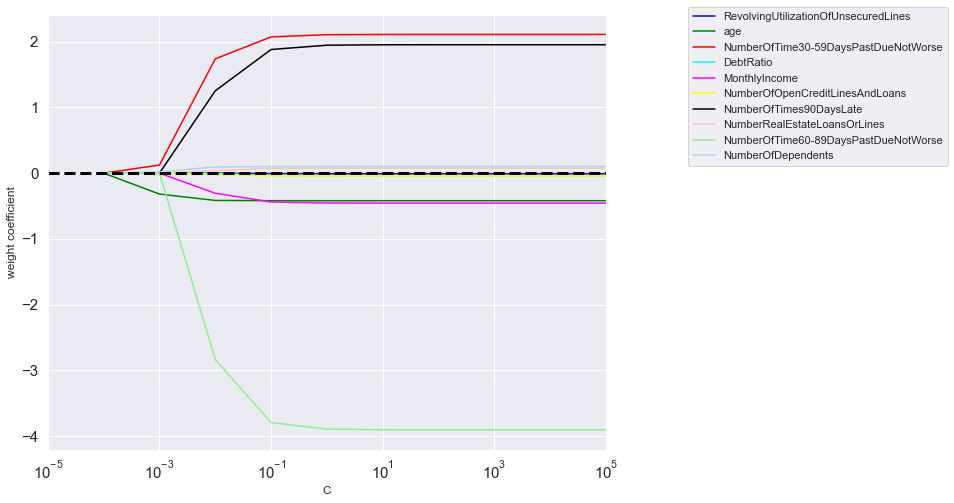

In [63]:
from sklearn.linear_model import LogisticRegression

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', 
                            multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=training_data.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('images/04_07.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)
plt.show()

According to the figure above, we can see that 'NumberOfTime30-59DaysPastDueNotWorse' and 'age' are the 2 most important features.

## Apply LR to do the prediction with 2 selected features

Try your own hyperparameters (C, gamma, tree depth, etc) to maximize the prediction accuracy.

In [73]:
X_train = X_train.loc[:, ['NumberOfTime30-59DaysPastDueNotWorse','age']]
X_test = X_test.loc[:, ['NumberOfTime30-59DaysPastDueNotWorse','age']]
X_test

,NumberOfTime30-59DaysPastDueNotWorse,age
1,0,43
2,0,57
3,0,59
4,1,38
5,0,27
...,...,...
101499,0,24
101500,3,36
101501,0,70
101502,0,56


In [74]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Predict the outcome

Accuracy: 0.984


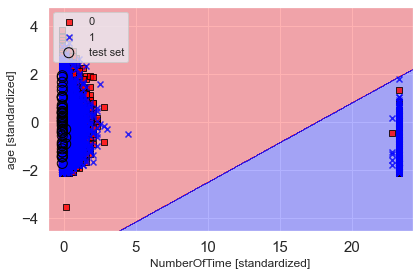

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(C=1, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('NumberOfTime [standardized]')
plt.ylabel('age [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Apply SVM to do the prediction with 2 selected features

Accuracy: 0.984


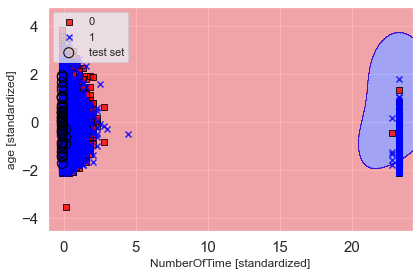

In [97]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('NumberOfTime [standardized]')
plt.ylabel('age [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Apply decision tree to do the prediction with 2 selected features

Accuracy: 0.984


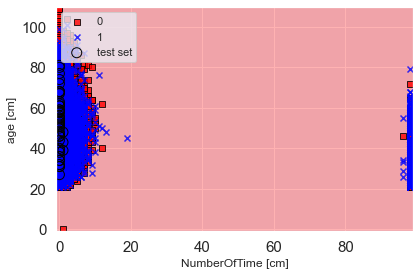

In [103]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)
y_pred = lr.predict(X_test_std)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('NumberOfTime [cm]')
plt.ylabel('age [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()